# Computer Vision - P1

### **Carefully read the following instructions before start coding.**

==============================================================================================
## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **English**.

- The deliverable must be a file named **P1_Student1_Student2.zip** that includes:
    - The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): October, 3, 2023 23:00 h**

==============================================================================================

## Practicum 1: Basics on Image Processing and Manipulation
==============================================================================================

The main topics are:

1. Image loading, saving and creation

2. Color manipulation

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

==============================================================================================
### Packages loading

First we need to import the required Python packages for basic image manipulation.

Run the following code:

In [2]:
import numpy as np # useful for manipulating matrices
from skimage import io # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the
notebook**):

In [3]:
%matplotlib inline

==============================================================================================
### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 150 rows and 300 columns where each value should be of type unsigned integer with 8 bits.

Text(0.5, 1.0, '150x300 Grayscale image')

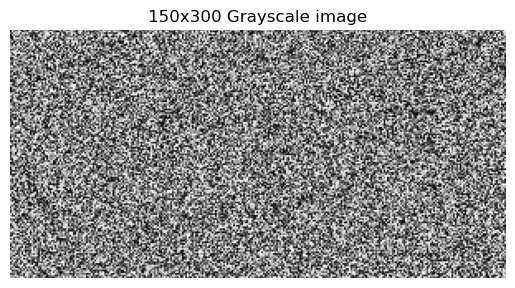

In [4]:
# create a 150x300 image with random values between 0 and 255 where each pixel is a 8-bit unsigned integer
q1_img = np.random.randint(0, 255, size=(150,300)).astype(np.uint8)
# show the image using matplotlib
plt.imshow(q1_img, cmap='gray')
plt.axis('off')
plt.title('150x300 Grayscale image')

How many different values can each pixel have in this case?

In [5]:
#ANSWER 
"""
Each pixel can have values from 0 to 255 bits
"""

b) Create and display a **RGB image** that has 200 rows and 200 columns where each value should be of type unsigned integer with 8 bits. Then, transform it to grayscale.:

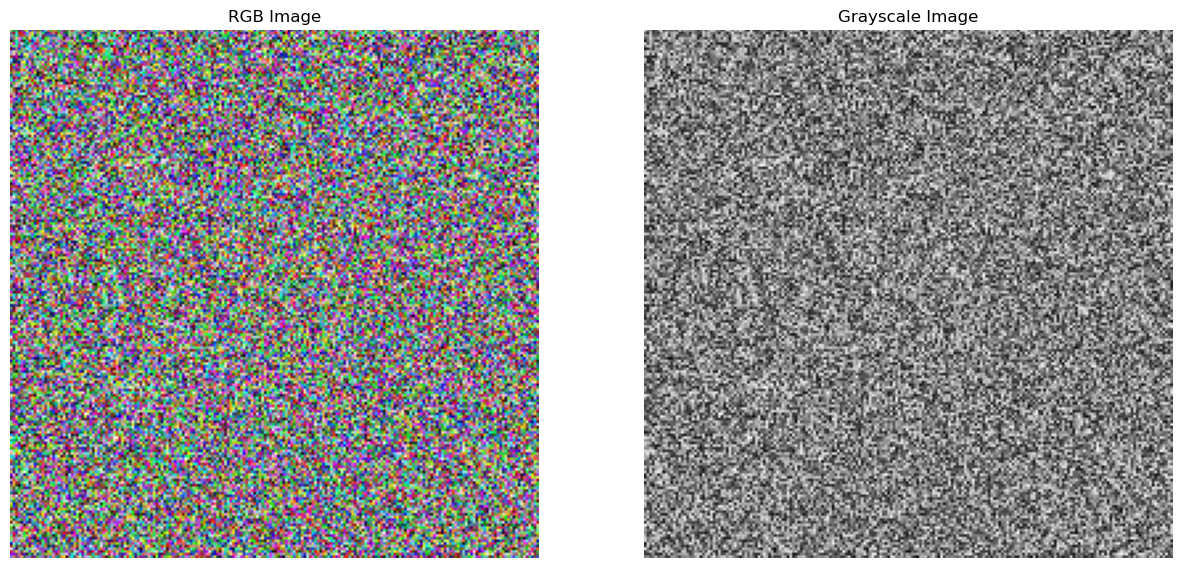

In [6]:
from skimage.color import rgb2gray
# subplots configuration
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
# create a 200x200 RGB image with random values between 0 and 255 where each pixel is a 8-bit unsigned integer
img = np.random.randint(0, 255, size=(200, 200, 3)).astype(np.uint8)
# show rgb image
ax = axs[0]
ax.axis('off')
ax.set_title('RGB Image')
ax.imshow(img)
# show grayscale image
ax = axs[1]
ax.axis('off')
ax.set_title('Grayscale Image')
img_gray = rgb2gray(img) # convert rgb image to grayscale
ax.imshow(img_gray, cmap='gray')

c) Change the color of the pixels of the image in section **a)** in such a way that the right half is white (255) and the left half is black (0).

Visualize the image and print the values of its first row.

Text(0.5, 1.0, '150x300  White and Black image')

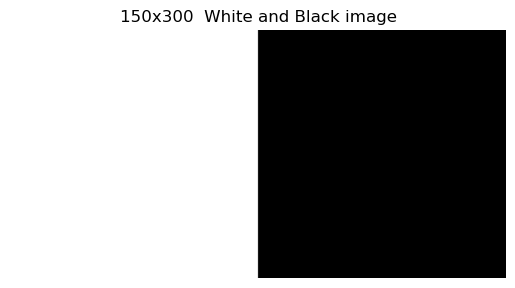

In [7]:
q3_img = q1_img.copy()
rows, cols = q3_img.shape # get image dimensions
q3_img[:, 0: int(cols / 2)] = 255 # set left half of the image to white
q3_img[:, int(cols / 2):cols] = 0 # set right half of the image to black
# show the image 
plt.imshow(q3_img, cmap='gray')
plt.axis('off')
plt.title('150x300  White and Black image')

d) Flip the image to create a mirror ilusion.

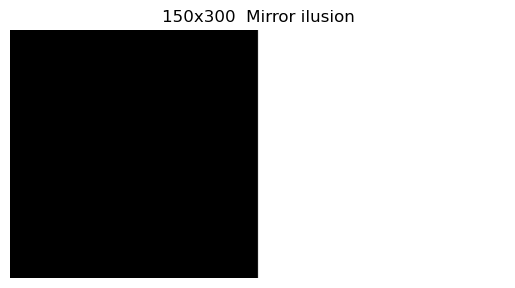

In [8]:
q4_img = q3_img.copy() # copy the last image
q4_img = q4_img[::, ::-1] # flip the image horizontally using slicing and negative step
# show the image
plt.axis('off')
plt.title('150x300  Mirror ilusion')
plt.imshow(q4_img, cmap='gray')

### 1.2 Image saving and loading

a) Use the IO image package to save the previously image:

In [9]:
io.imsave('q4_img.png', q4_img) # Save the image

b) Load the saved image and visualize it. Print the dimensions, the value of pixel (10,50) and data type in order to check everything is correct

In [10]:
# load the image
q5_img = io.imread('q4_img.png')
print(q5_img.shape) # print image dimensions
print(q5_img[10][50]) # print pixel value at row 10 and column 50
print(q5_img.dtype) # print image data type

(150, 300)
0
uint8


### 1.3 Color image manipulation

a) Load and show the image `images_notebook/dog.jpg`, and check its dimensions and data type.

**Note:** Pictures may appear in the figure with pseudocolors. What commands to use in order to display them in **RGB** color and in **grayscale**?!

(390, 400, 3)
uint8


Text(0.5, 1.0, 'Dog image')

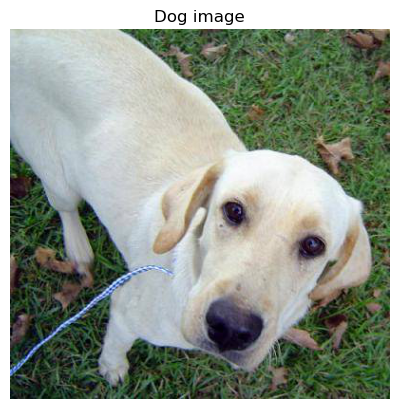

In [11]:
#Answer
"""
If the image is already RGB, that is, it already has 3 channels, just show it with im.show(...)
If we want to show it in grayscale we can use the rgb2gray function of skimage.color to transform it and show it with im.show(..., cmap="gray").
It should be noted that there is also the gray2rgb function which, according to the official scikit-image documentation, applied to a grayscale image, will duplicate the gray tones in the 3 channels.
"""

q6_img = io.imread('images_notebook/dog.jpg') # load the dog image
print(q6_img.shape) # print image dimensions
print(q6_img.dtype) # print image data type
# show the image
plt.imshow(q6_img)
plt.axis('off')
plt.title('Dog image')

b) Convert the previous image to grayscale, and **save it**.

Moreover, plot the two images (RGB & greyscale) in a single figure, and show details such as shape, dtype, max and min values.

(390, 400)
float64
0.0028054901960784316
0.9966666666666667


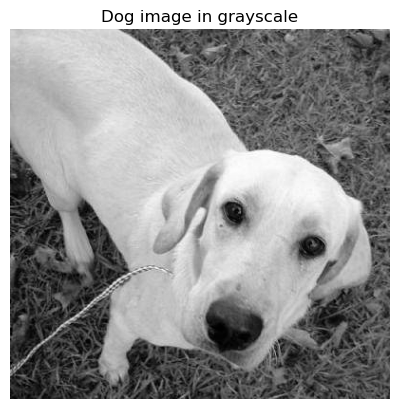

In [32]:
q7_img = q6_img.copy() # copy the dog image
q7_img = rgb2gray(q7_img) # convert the image to grayscale
# show the image
plt.axis('off')
plt.title ('Dog image in grayscale')
plt.imshow(q7_img, cmap='gray')
# print data type, dimensions, min and max values
print(q7_img.shape)
print(q7_img.dtype)
print(q7_img.min())
print(q7_img.max())

c) Compute the mean of the previous grayscale image and use a logical operation to obtain a boolean image. Pixels greather than the mean value must be shown as white. Display the binary image.

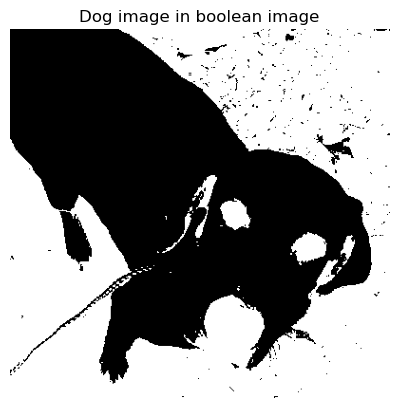

In [13]:
# create a boolean image where each pixel is True if the pixel value is greater than the mean and False otherwise
boolean_img = q7_img > q7_img.mean()
# show the image with cmpa='binary' to display True as white and False as black
plt.axis('off')
plt.title('Dog image in boolean image')
plt.imshow(boolean_img, cmap='binary')

d) Visualize in the same figure all the three images: (1) the original image, (2) the gray image, and (3) the binarized image. Set the corresponding titles of the images and their descriptions

Text(0.5, 1.0, 'Boolean Image')

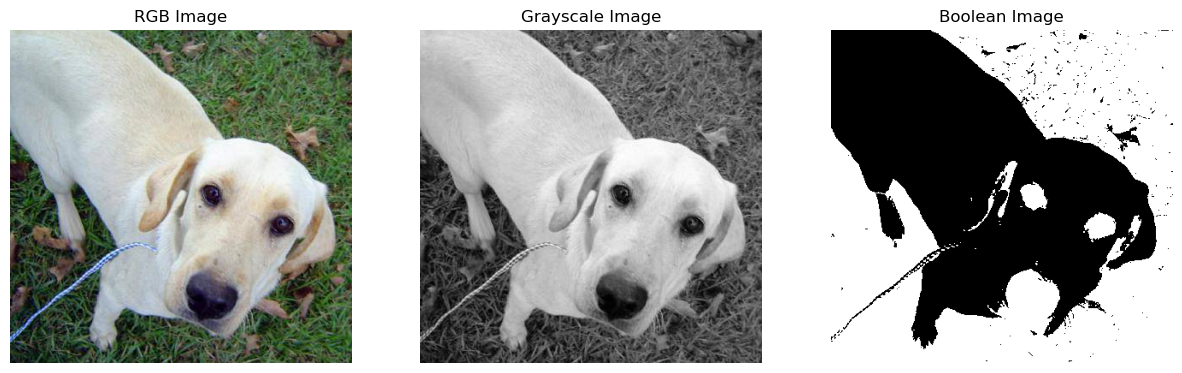

In [14]:
# subplots configuration
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax = axs[0]
ax.imshow(q6_img)
ax.axis('off')
ax.set_title('RGB Image')

ax = axs[1]
ax.imshow(q7_img, cmap='gray')
ax.axis('off')
ax.set_title('Grayscale Image')

ax = axs[2]
ax.imshow(boolean_img, cmap='binary')
ax.axis('off')
ax.set_title('Boolean Image')

### 1.4 Images manipulation

a) Create an RGB black image, 10% larger than the dog image. Afterwards, embed the dog image in the center. Show the framed image.

**Note:** Be carefull with the number of channels.

**Note:** Print the original image shape and the new image size to check if the sizes of the second one are 10% larger then the first one.


Original Image Shape: (390, 400, 3)
New Image Shape: (429, 440, 3)
True True


Text(0.5, 1.0, 'Framed dog image')

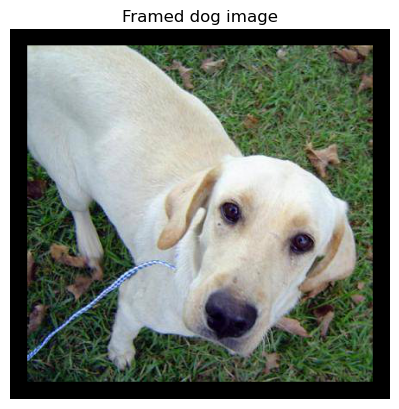

In [15]:
from skimage.transform import rescale

rows_q6, cols_q6, _ = q6_img.shape # get the dog image dimensions
q8_img = np.zeros((rows_q6, cols_q6, 3), dtype=np.uint8) # create a black image with the same dimensions as the dog image
print("Original Image Shape:", q8_img.shape)
rescaled = rescale(q8_img, 1.1).astype(np.uint8) # rescale the black image to 110% of the original size
print("New Image Shape:", rescaled.shape)
rows_rescaled, cols_rescaled, _ = rescaled.shape
print(rows_rescaled == int(rows_q6 * 1.1), cols_rescaled == int(cols_q6 * 1.1)) # check if the rescaled image has the expected dimensions

# calculate the difference between the dimensions of the rescaled image and the dog image
diff_rows = int((rows_rescaled - rows_q6) / 2)
diff_cols = int((cols_rescaled - cols_q6) / 2)

# Assigns the pixels of the image in the center of the rescaled image using the difference between the dimensions of the rescaled image and the dog image
rescaled[diff_rows:diff_rows+rows_q6, diff_cols:diff_cols+cols_q6, :] = q6_img

# show the image
plt.imshow(rescaled)
plt.axis('off')
plt.title('Framed dog image')

b) Change the frame of the new image to green. Visualize the three images: original, black frame and green frame, in one single figure, with their respective titles.

Text(0.5, 1.0, 'Green frame')

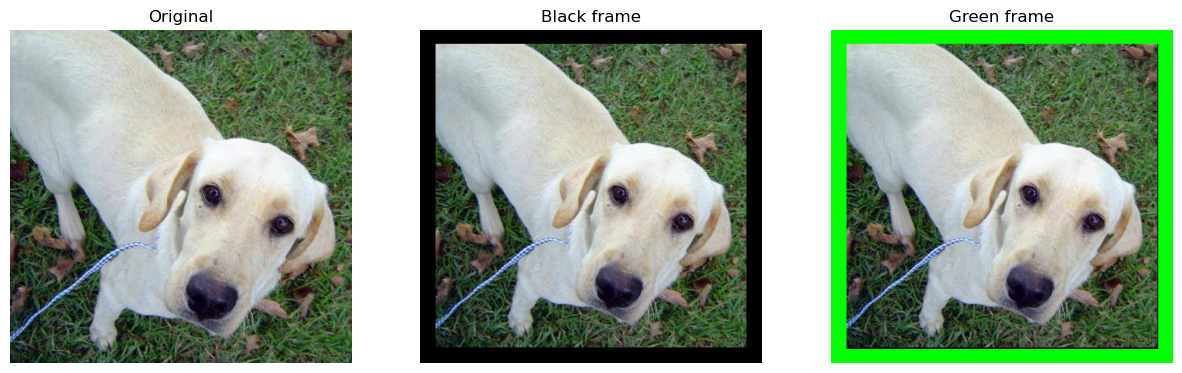

In [16]:
q9_img = rescaled.copy() # copy the framed dog image
rows_q9, cols_q9, _ = q9_img.shape # get the image dimensions
for i in range(rows_q9):
    for j in range(cols_q9):
        # if the pixel is in the border top or bottom set the green channel to 255
        if i < diff_rows or i > rows_q9 - diff_rows:
            q9_img[i][j][1] = 255
        # if the pixel is in the border left or right set the green channel to 255
        if j < diff_cols or j > cols_q9 - diff_cols:
            q9_img[i][j][1] = 255

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax = axs[0]
ax.imshow(q6_img)
ax.axis('off')
ax.set_title('Original')

ax = axs[1]
ax.imshow(rescaled)
ax.axis('off')
ax.set_title('Black frame')

ax = axs[2]
ax.imshow(q9_img)
ax.axis('off')
ax.set_title('Green frame')


### 1.5 Contrast enhancement

a) Open the image `images_notebook/car_lowContrast.jpg` and visualize it without graylevel enhancement. Print the image size, data type, minimum and maximum of the image.

**Note:** When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default. To this purpose, check the data type and used the maximum and minimum value corresponding to this type.


size:  267120
dtype:  uint8
min:  63
max:  193


Text(0.5, 1.0, 'Image without graylevel enhancement')

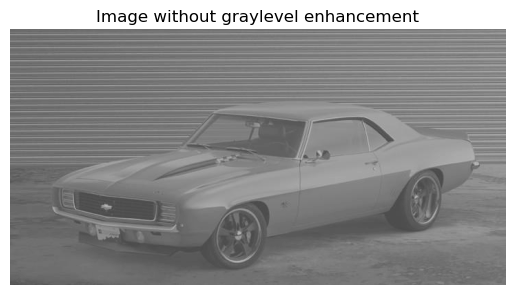

In [17]:
q10_img = io.imread('images_notebook/car_lowContrast.jpg')

# Print values of the image
print("size: ", q10_img.size)
print("dtype: ", q10_img.dtype)
print("min: ", q10_img.min())
print("max: ", q10_img.max())

plt.imshow(q10_img, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title('Image without graylevel enhancement')

b) Create an image called `dark_image` using the  values from the original one. Compute the minimum value of the image and substract this value of the original image. Print the new maximum a minimum values. Show the new image without graylevel enhancement.

min:  0
max:  130


Text(0.5, 1.0, 'Black Image')

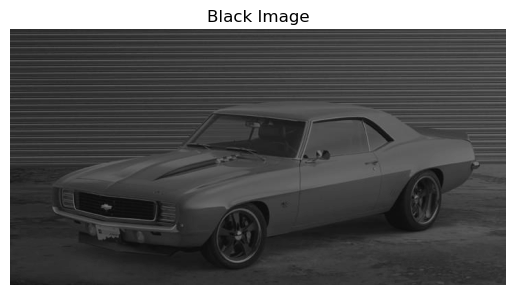

In [18]:
dark_image = q10_img.copy()

# Create the dark_image by subtracting the minimum value of the original
dark_image -= q10_img.min()

# Print the min and max values of the image
print("min: ", dark_image.min())
print("max: ", dark_image.max())

plt.imshow(dark_image, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title('Black Image')

c) Similarly to the previous question, create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and show the new image without graylevel enhancement.


min:  83
max:  255


Text(0.5, 1.0, 'Bright Image')

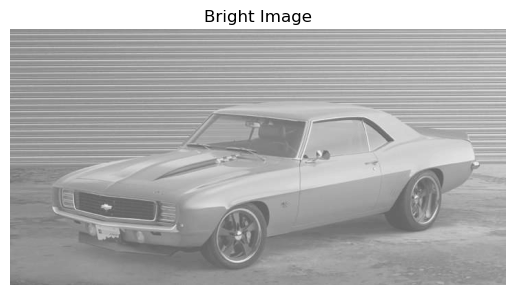

In [19]:
bright_im = q10_img.copy()

# Create the bright_im by scaling the original image
bright_im = ((bright_im / bright_im.max()) * 255).astype(np.uint8) # Convert image dtype to uint8 to preserve original dtype

# Print the min and max values of the image
print("min: ", bright_im.min())
print("max: ", bright_im.max())

plt.imshow(bright_im, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.title('Bright Image')

d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command [rescale_intensity](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity). Check the minimal and maximal values of the enhanced image, and compare them with the previous one. Show the two images  without graylevel enhancement.

min original:  63 | min dark:  0 | min bright:  83 | min enhanced:  0.0
max original:  193 | max dark:  130 | max bright:  255 | max enhanced:  255.0


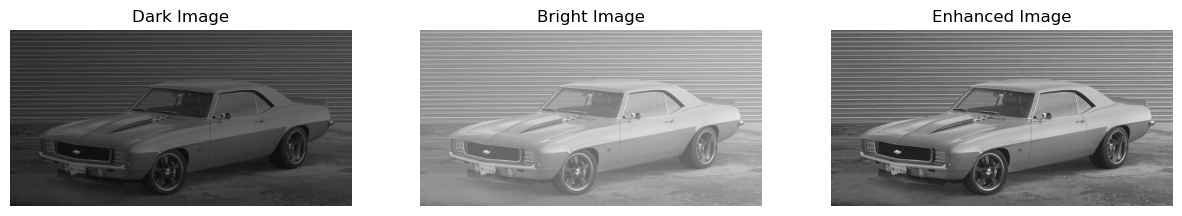

In [20]:
from skimage import exposure

# Method 1: Direct Manipulation for Contrast Enhancement
direct_contrast_enhanced_im = (q10_img - q10_img.min()) / (q10_img.max() - q10_img.min()) * 255

# Method 2: Contrast Enhancement using scikit-image's rescale_intensity
skimage_contrast_enhanced_im = exposure.rescale_intensity(q10_img, in_range='image', out_range=(0, 255))

# Print the min and max values of previous images to compare with enhanced image
print("min original: ", q10_img.min(), "| min dark: ", dark_image.min(),
      "| min bright: ", bright_im.min(), "| min enhanced: ", skimage_contrast_enhanced_im.min())
print("max original: ", q10_img.max(), "| max dark: ", dark_image.max(),
      "| max bright: ", bright_im.max(), "| max enhanced: ", skimage_contrast_enhanced_im.max())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(dark_image, cmap='gray', vmin=0, vmax=255)
axs[0].axis('off')
axs[0].set_title('Dark Image')

axs[1].imshow(bright_im, cmap='gray', vmin=0, vmax=255)
axs[1].axis('off')
axs[1].set_title('Bright Image')

axs[2].imshow(skimage_contrast_enhanced_im, cmap='gray', vmin=0, vmax=255)
axs[2].axis('off')
axs[2].set_title('Enhanced Image')

plt.show()

e) Visualize the 5 images in the same figure, each one with its corresponding title.

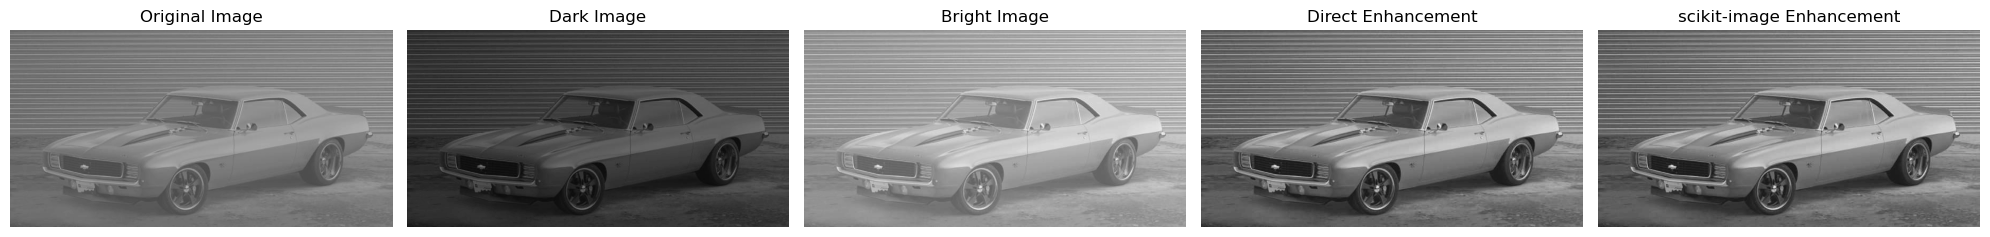

In [21]:
fig, axs = plt.subplots(1, 5, figsize=(20, 5))

# Original Image
axs[0].imshow(q10_img, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

# Darkened Image
axs[1].imshow(dark_image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Dark Image')
axs[1].axis('off')

# Brightened Image
axs[2].imshow(bright_im, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Bright Image')
axs[2].axis('off')

# Direct Enhancement
axs[3].imshow(direct_contrast_enhanced_im, cmap='gray', vmin=0, vmax=255)
axs[3].set_title('Direct Enhancement')
axs[3].axis('off')

# scikit-image Enhancement
axs[4].imshow(skimage_contrast_enhanced_im, cmap='gray', vmin=0, vmax=255)
axs[4].set_title('scikit-image Enhancement')
axs[4].axis('off')

plt.tight_layout()
plt.show()

### 1.6 Color manipulation

a) Read and visualize the image `images_notebook/Guell_Park.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/Guell_Park.jpg">

<img src="images_notebook/exchannels.png">

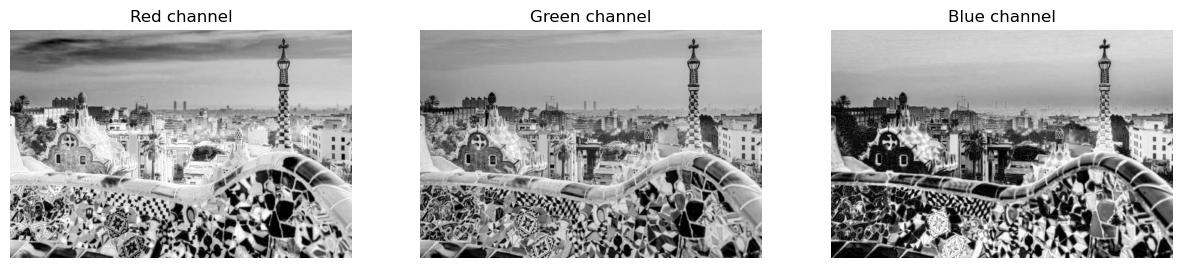

In [22]:
q11_img = io.imread('images_notebook/Guell_Park.jpg')
red_channel = q11_img[:, :, 0] # Put red channel in a new np array
green_channel = q11_img[:, :, 1] # Put green channel in a new np array
blue_channel = q11_img[:, :, 2] # Put blue channel in a new np array

# Displays each channel of the image separately
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(red_channel, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Red channel')

axs[1].imshow(green_channel, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Green channel')

axs[2].imshow(blue_channel, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Blue channel')

plt.show()

b) Construct and visualize a new image, interchanging the red and green channels.

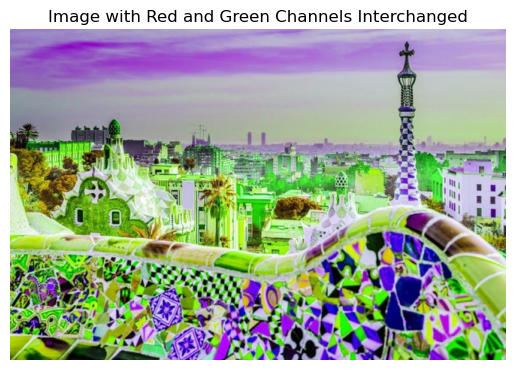

In [23]:
red_green_change = q11_img.copy()

red_green_change[:, :, 0] = q11_img[:, :, 1] # Set the red channel to the green channel
red_green_change[:, :, 1] = q11_img[:, :, 0] # Set the green channel to the red channel

plt.imshow(red_green_change)
plt.title('Image with Red and Green Channels Interchanged')
plt.axis('off')
plt.show()

c) Read and visualize the image images_notebook/donald_trump.jpg. Use the the bottom figure as an example to create a modern piece of art, extracting its three channels and embedding the image to a colored background.
<img src="images_notebook/art_trump.jpg" width="400">

Hint:extract the channel, fill with zeros the other 2 color channels. Using the alpha channel of the RGBA image, set those transparent to a solid color.
In the image above we used the background colors: (255,255,0), (48,213,200) and (128,0,128)

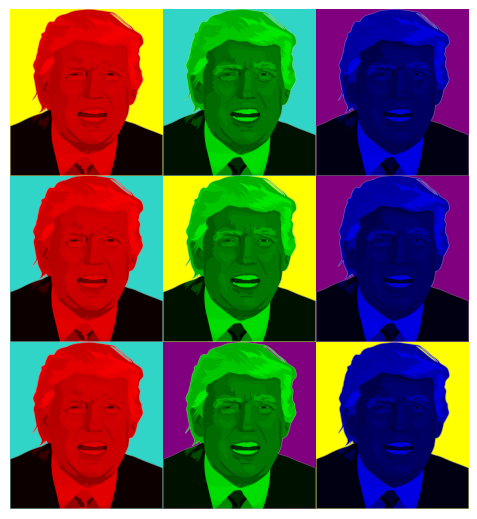

In [24]:
q12_img = io.imread('images_notebook/donald_trump.png') # Load the image

red_trump = q12_img.copy()
red_trump[:, :, 1] = 0 # Set the green channel to 0
red_trump[:, :, 2] = 0 # Set the blue channel to 0

green_trump = q12_img.copy()
green_trump[:, :, 0] = 0 # Set the red channel to 0
green_trump[:, :, 2] = 0 # Set the blue channel to 0

blue_trump = q12_img.copy()
blue_trump[:, :, 0] = 0 # Set the red channel to 0
blue_trump[:, :, 1] = 0 # Set the green channel to 0

# Define background colors as a numpy array
background_colors = np.array([
    [255, 255, 0, 255],  # yellow
    [48, 213, 200, 255],  # teal
    [128, 0, 128, 255]  # purple
], dtype=np.uint8)

# Create a list to store the modern art pieces
modern_art_pieces = []

for i in range(3):
    # Shuffle the background colors to
    np.random.shuffle(background_colors)

    art_piece = red_trump.copy() # Copy the red trump image
    black_pixels = np.all(art_piece == [0, 0, 0, 0], axis=-1) # Get the black pixels of the image
    art_piece[black_pixels] =  background_colors[0] # Set the black pixels to the first color of the background colors
    modern_art_pieces.append(art_piece) # Add the art piece to the list

    # Repeat the same process for the green and blue trump images

    art_piece = green_trump.copy()
    black_pixels = np.all(art_piece == [0, 0, 0, 0], axis=-1)
    art_piece[black_pixels] =  background_colors[1]
    modern_art_pieces.append(art_piece)

    art_piece = blue_trump.copy()
    black_pixels = np.all(art_piece == [0, 0, 0, 0], axis=-1)
    art_piece[black_pixels] = background_colors[2]
    modern_art_pieces.append(art_piece)


fig, axs = plt.subplots(3, 3, figsize=(4.6, 5))

# Display the modern art pieces
for i in range(3):
    for j in range(3):
        axs[i][j].imshow(modern_art_pieces[i * 3 + j])
        axs[i][j].axis('off')

plt.tight_layout(pad=0)
plt.show()


### 1.7 Masks and logical image manipulation

a) Read the image `images_notebook/circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

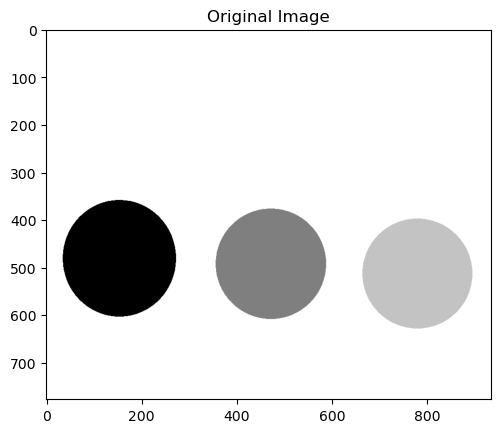

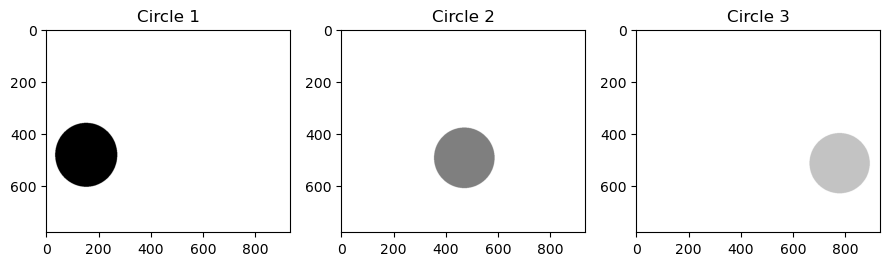

In [25]:
from skimage import color, measure

# Load the image
q13_img = io.imread('images_notebook/circles.bmp')
plt.imshow(q13_img)
plt.title('Original Image')

# Convert the image to grayscale
gray_image = color.rgb2gray(q13_img)

# Threshold the grayscale image to create binary masks for each circle
threshold = 0.8  # Adjust this threshold as needed
binary_masks = gray_image < threshold

# Label connected components (circles) in the binary masks
labeled_masks = measure.label(binary_masks, background=0)

individual_circles = []
for label in np.unique(labeled_masks)[1:]:  # Skip the background label (0)
    circle_mask = labeled_masks == label

    # Apply the circle mask to the original image to extract the circle
    individual_circle = q13_img.copy()
    individual_circle[~circle_mask] = 255 # Set the pixels outside the mask (current circle) to white
    individual_circles.append(individual_circle)

# Display the figures
fig, axs = plt.subplots(1, len(individual_circles), figsize=(3 * len(individual_circles), 10))
for i, circle in enumerate(individual_circles):
    axs[i].imshow(circle)
    axs[i].set_title(f'Circle {i + 1}')

plt.tight_layout()
plt.show()

b) Given the images `images_notebook/coat.png` and `images_notebook/model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying [resize, rotate, etc...](https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html) keep track how the image type and values range change. When necessary, apply type conversion using [img_as_float, img_as_uint, img_as_ubyte.](https://scikit-image.org/docs/stable/api/skimage.html)

**Note: DO NOT USE LOOPS to overlap the images!! It will be penalized.**


Text(0.5, 1.0, 'Model with coat and texture')

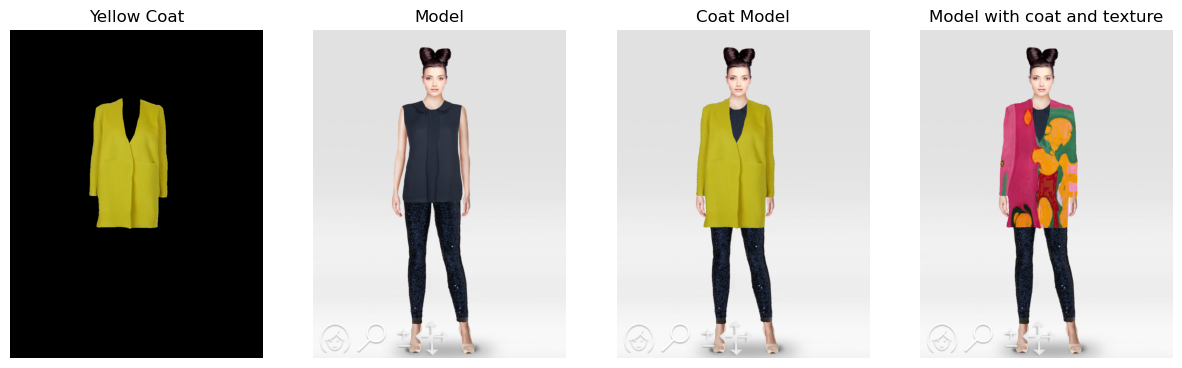

In [26]:
from skimage import img_as_ubyte
from skimage.transform import rescale

coat = io.imread('images_notebook/coat.png')  # load coat image
model = io.imread('images_notebook/model.png') # load model image
texture = io.imread('images_notebook/texture.jpeg') # load texture image    

yellow_coat = coat.copy()

coat_model = coat.copy()
coat_model[coat_model == 0] = model[coat_model == 0] # replace black pixels of coat with model pixels

# Coat with texture
texture_img = img_as_ubyte(texture) # convert texture image to uint8
coat_img = img_as_ubyte(coat) # convert coat image to uint8
# add fourth channel to texture image
texture_img = np.dstack((texture_img, np.ones(texture_img.shape[:2], dtype=np.uint8) * 255))
# resize texture image to coat image
# width scale factor
w_scale = coat_img.shape[1] / texture_img.shape[1]
# height scale factor
h_scale = coat_img.shape[0] / texture_img.shape[0]
# scale texture image
texture_img = rescale(texture_img, (h_scale, w_scale, 1), anti_aliasing=True)
# convert to uint8
texture_img = img_as_ubyte(texture_img)


coat_img[coat_img != 0] = texture_img[coat_img != 0] # replace non black pixels of coat with texture pixels
coat_img[coat_img == 0] = model[coat_img == 0] # replace black pixels of coat with model pixels

# display
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].imshow(yellow_coat)
axs[0].axis('off')
axs[0].set_title('Yellow Coat')

axs[1].imshow(model)
axs[1].axis('off')
axs[1].set_title('Model')

axs[2].imshow(coat_model)
axs[2].axis('off')
axs[2].set_title('Coat Model')

axs[3].imshow(coat_img)
axs[3].axis('off')
axs[3].set_title('Model with coat and texture')
